In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


let's just first test one of our dispersive bistability curves

In [28]:
# load coefficients from pkl
coefficients = pkl.load(open('polyfit.pkl', 'rb'))

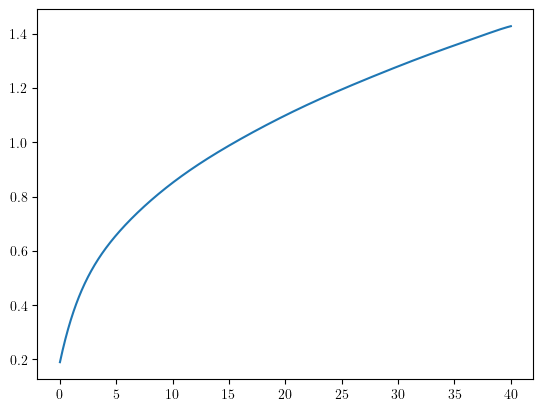

In [29]:
Iin = np.linspace(0,40,1000)
Iout = np.polyval(coefficients, Iin)

plt.plot(Iin, Iout, label='Polynomial fit')

In [ ]:

# Define cavity NL function
class CavityActivation(nn.Module):
    def __init__(self):
        super(CavityActivation, self).__init__()
        
    def forward(self, x):
        coeffs = torch.tensor(coefficients, dtype=x.dtype, device=x.device)
        # Horner's method for faster evaluation
        poly_val = coeffs[0]
        for coeff in coeffs[1:]:
            poly_val = poly_val * x + coeff
        return poly_val

# barebones NN for mnist
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.activation = CavityActivation()
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

In [37]:

# load mnist
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=128, 
                                           shuffle=True)

model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [38]:
loss_list = []
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_list.append(running_loss)
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss))

Epoch 1 loss: 1062.483
Epoch 2 loss: 1011.408
Epoch 3 loss: 899.031
Epoch 4 loss: 689.472
Epoch 5 loss: 463.704
Epoch 6 loss: 342.526
Epoch 7 loss: 282.015
Epoch 8 loss: 242.867
Epoch 9 loss: 219.134
Epoch 10 loss: 203.414


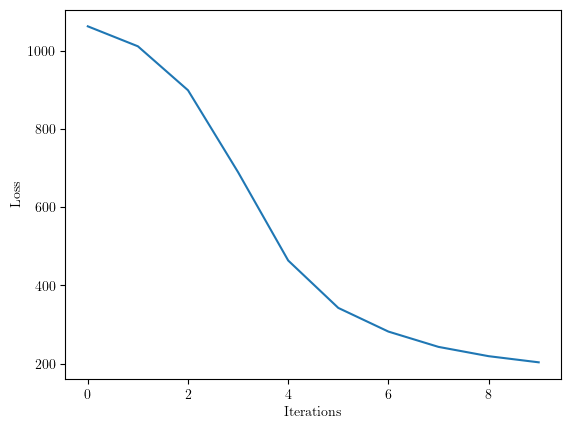

In [39]:
plt.plot(range(10),loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()